In [1]:
!pip install imbalanced-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE


In [4]:
# Load CSV''
df = pd.read_csv('/content/flights_sample_3m.csv')

# Select columns
cols = [
    'AIRLINE', 'DEP_DELAY', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'ARR_DELAY'
]
df = df[cols].dropna()


In [5]:
# Target column
df['is_delayed'] = df['ARR_DELAY'].apply(lambda x: 1 if x > 15 else 0)
df.drop('ARR_DELAY', axis=1, inplace=True)


In [6]:
# Encode Airline
le = LabelEncoder()
df['AIRLINE'] = le.fit_transform(df['AIRLINE'])

# Split features/target
X = df.drop('is_delayed', axis=1)
y = df['is_delayed']


In [7]:
# Balance using SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)
import pickle

# Save model
with open("delay_predictor.pkl", "wb") as f:
    pickle.dump(rf, f)   # or rf if you'

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [16]:
# Save the LabelEncoder
with open("airline_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       896
           1       1.00      0.99      1.00       876

    accuracy                           1.00      1772
   macro avg       1.00      1.00      1.00      1772
weighted avg       1.00      1.00      1.00      1772



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


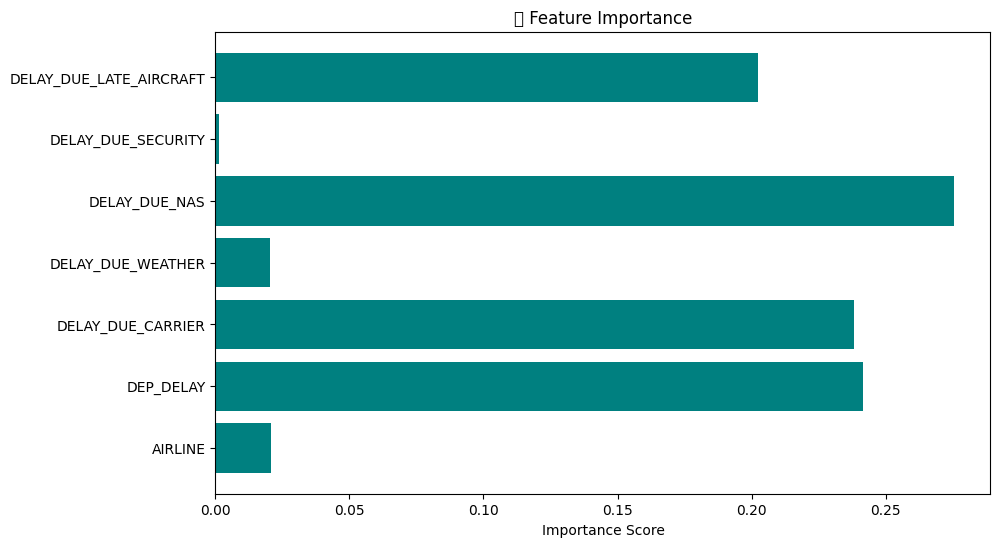

In [9]:
# Classification report
print(classification_report(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(10,6))
importances = rf.feature_importances_
plt.barh(X.columns, importances, color='teal')
plt.title("📊 Feature Importance")
plt.xlabel("Importance Score")
plt.show()

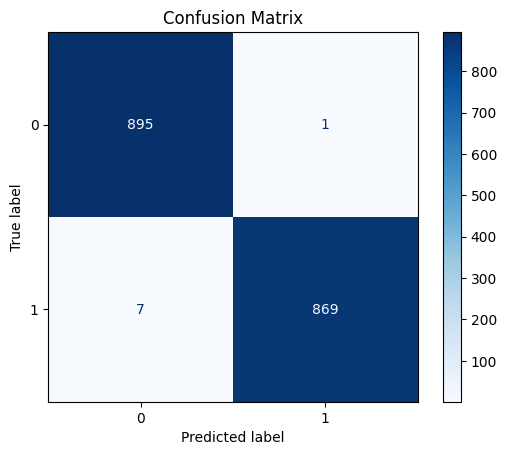

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()




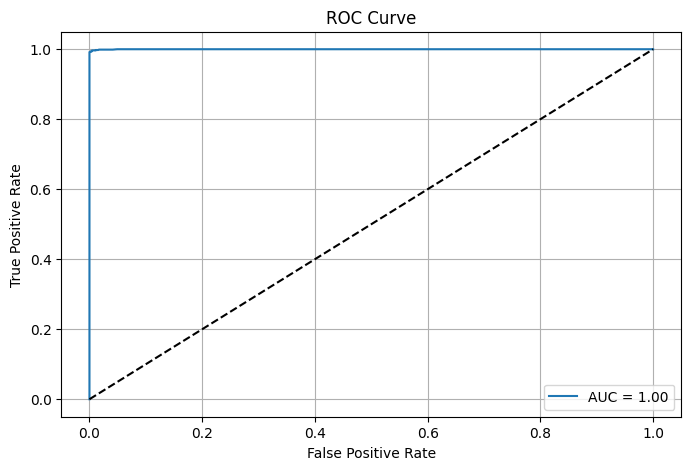

In [11]:
# ROC Curve
y_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


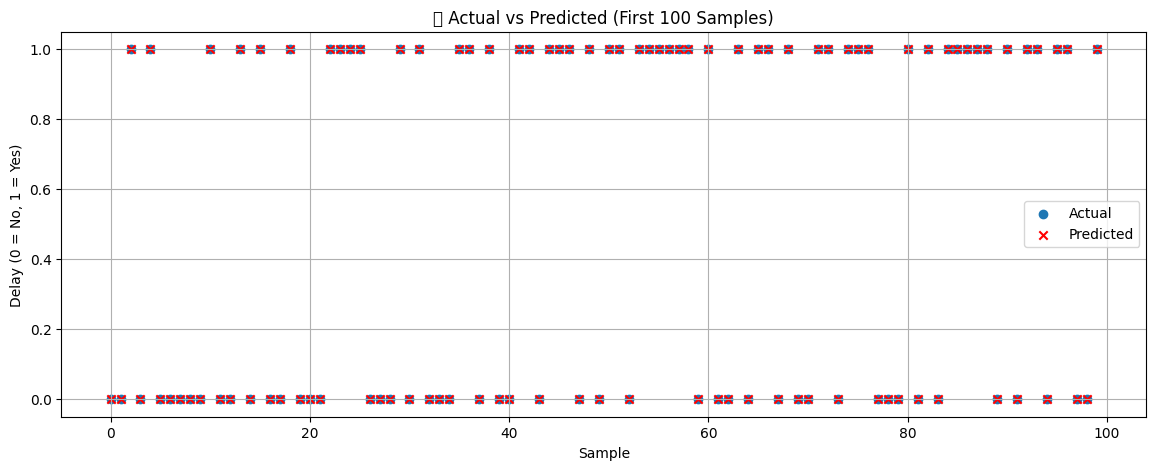

In [12]:
# Actual vs Predicted (first 100)
comparison = pd.DataFrame({'Actual': y_test[:100].values, 'Predicted': y_pred[:100]})
plt.figure(figsize=(14,5))
plt.scatter(range(100), comparison['Actual'], label='Actual', marker='o')
plt.scatter(range(100), comparison['Predicted'], label='Predicted', marker='x', color='red')
plt.legend()
plt.title("🔍 Actual vs Predicted (First 100 Samples)")
plt.xlabel("Sample")
plt.ylabel("Delay (0 = No, 1 = Yes)")
plt.grid(True)
plt.show()

In [17]:
from google.colab import files
files.download("delay_predictor.pkl")
files.download("airline_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>